In [2]:
from prose import example_image
from prose import FitsManager, FITSImage, Sequence, blocks
#import import_ipynb
#import test_bad_pixels

In [ ]:


# getting the example image
example_image = example_image()
example_image.data = image_with_hot_pixels
example_image.show()

Parsing FITS: 100%|██████████| 100/100 [00:00<00:00, 2307.19it/s]


INFO telescope  not found - using default


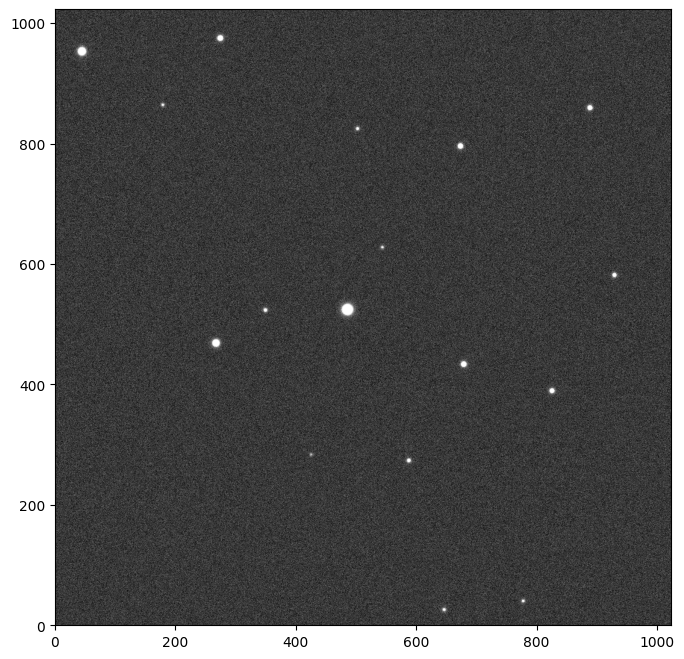

In [6]:
fm = FitsManager("./images_generated_light", depth=1)
ref = FITSImage(fm.all_images[0])
ref.show()

In [16]:
FITSImage(fm.all_images[0]).data

array([[446., 458., 445., ..., 443., 434., 443.],
       [443., 442., 435., ..., 430., 445., 429.],
       [431., 476., 459., ..., 432., 421., 443.],
       ...,
       [467., 435., 466., ..., 467., 428., 441.],
       [433., 453., 446., ..., 430., 452., 450.],
       [464., 440., 453., ..., 442., 437., 448.]])

In [ ]:
ref.data

In [ ]:
image = ref.data  # 1024x1024 image filled with ones
percentage_hot =  0.306 # 5% of pixels to be set as 'hot'
percentage_cold = 0.271  # 5% of pixels to be set as 'hot'
peak = 12000       # Mean value of hot pixels
variance = 500    # Variance of the hot pixel values

# Apply hot pixels
image_with_dead_pixels = introduce_dead_pixels(image, percentage_cold)
image_with_hot_pixels = introduce_hot_pixels(image, percentage_hot, peak, variance)

# Plot the image with the hot pixels
plt.imshow(image_with_hot_pixels, cmap="gray", vmin=0, vmax=peak + 3*np.sqrt(variance))
plt.colorbar(label="Pixel Value")
plt.title(f"Image with {percentage}% Hot Pixels (Peak={peak}, Variance={variance})")
plt.show()


In [ ]:
# getting the example image
example_image = example_image()
example_image.data = image_with_hot_pixels
example_image.show()

In [ ]:
calibration = Sequence(
    [
        #blocks.Calibration(darks=fm.all_darks, bias=fm.all_bias, flats=fm.all_flats),
        #blocks.Trim(),
        blocks.PointSourceDetection(),  # stars detection
        blocks.Cutouts(21),  # making stars cutouts
        blocks.MedianEPSF(),  # building PSF
        blocks.psf.Moffat2D(),  # modeling PSF
    ]
)

calibration.run([ref], show_progress=False)
    
ref.show()
ref.sources

In [ ]:
calibration_2 = Sequence(
    [
        #blocks.Calibration(darks=fm.all_darks, bias=fm.all_bias, flats=fm.all_flats),
        #blocks.Trim(),
        blocks.PointSourceDetection(),  # stars detection
        blocks.Cutouts(21),  # making stars cutouts
        blocks.MedianEPSF(),  # building PSF
        blocks.psf.Moffat2D(),  # modeling PSF
    ]
)


calibration_2.run([example_image], show_progress=False)

example_image.show()
example_image.sources